In [88]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
%matplotlib inline

In [89]:
DataPath = "C:/Users/xx/Desktop/xx/Resize/" # path for dataset
Categories = ["BHP", "Petronas", "Shell"]
Class_example = []

datasets = []

for category in Categories:
    path = os.path.join(DataPath, category)
    print(path)
    class_num = Categories.index(category)
    print(class_num)
        
    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (100, 100))
        datasets.append([new_array, class_num])


from sklearn.model_selection import train_test_split
import random

Train_data, Test_data= train_test_split(datasets, test_size = 0.40, random_state=3)

print('Train set length: ', len(Train_data))
print('Test set length: ', len(Test_data))

C:/Users/Aloysius Ong/Desktop/1161200577/Program/Resize/BHP
0


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1617.32it/s]


C:/Users/Aloysius Ong/Desktop/1161200577/Program/Resize/Petronas
1


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1644.04it/s]


C:/Users/Aloysius Ong/Desktop/1161200577/Program/Resize/Shell
2


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1823.08it/s]


Train set length:  180
Test set length:  120


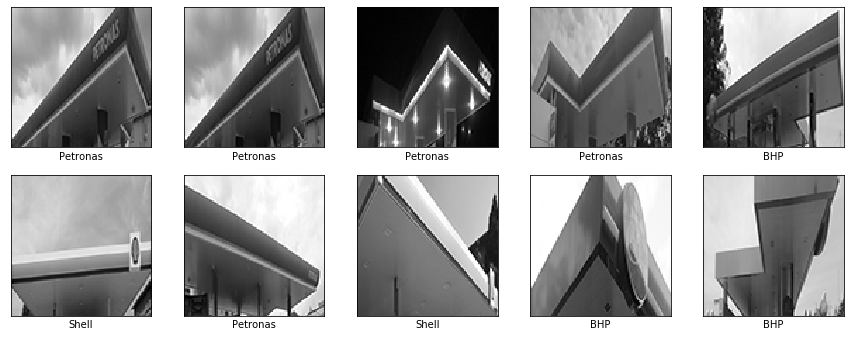

In [90]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Train_data[i][0], cmap='gray')
    plt.xlabel(Categories[Train_data[i][1]])
plt.show()

In [91]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for features,label in Train_data:
    X_train.append(features)
    Y_train.append(label)

for features,label in Test_data:
    X_test.append(features)
    Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(180, 100, 100)
(180,)
(120, 100, 100)
(120,)


In [92]:
print("Shape of training set: {}".format(X_train.shape))
print("Shape of testing set: {}".format(X_test.shape))

Shape of training set: (180, 100, 100)
Shape of testing set: (120, 100, 100)


In [93]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

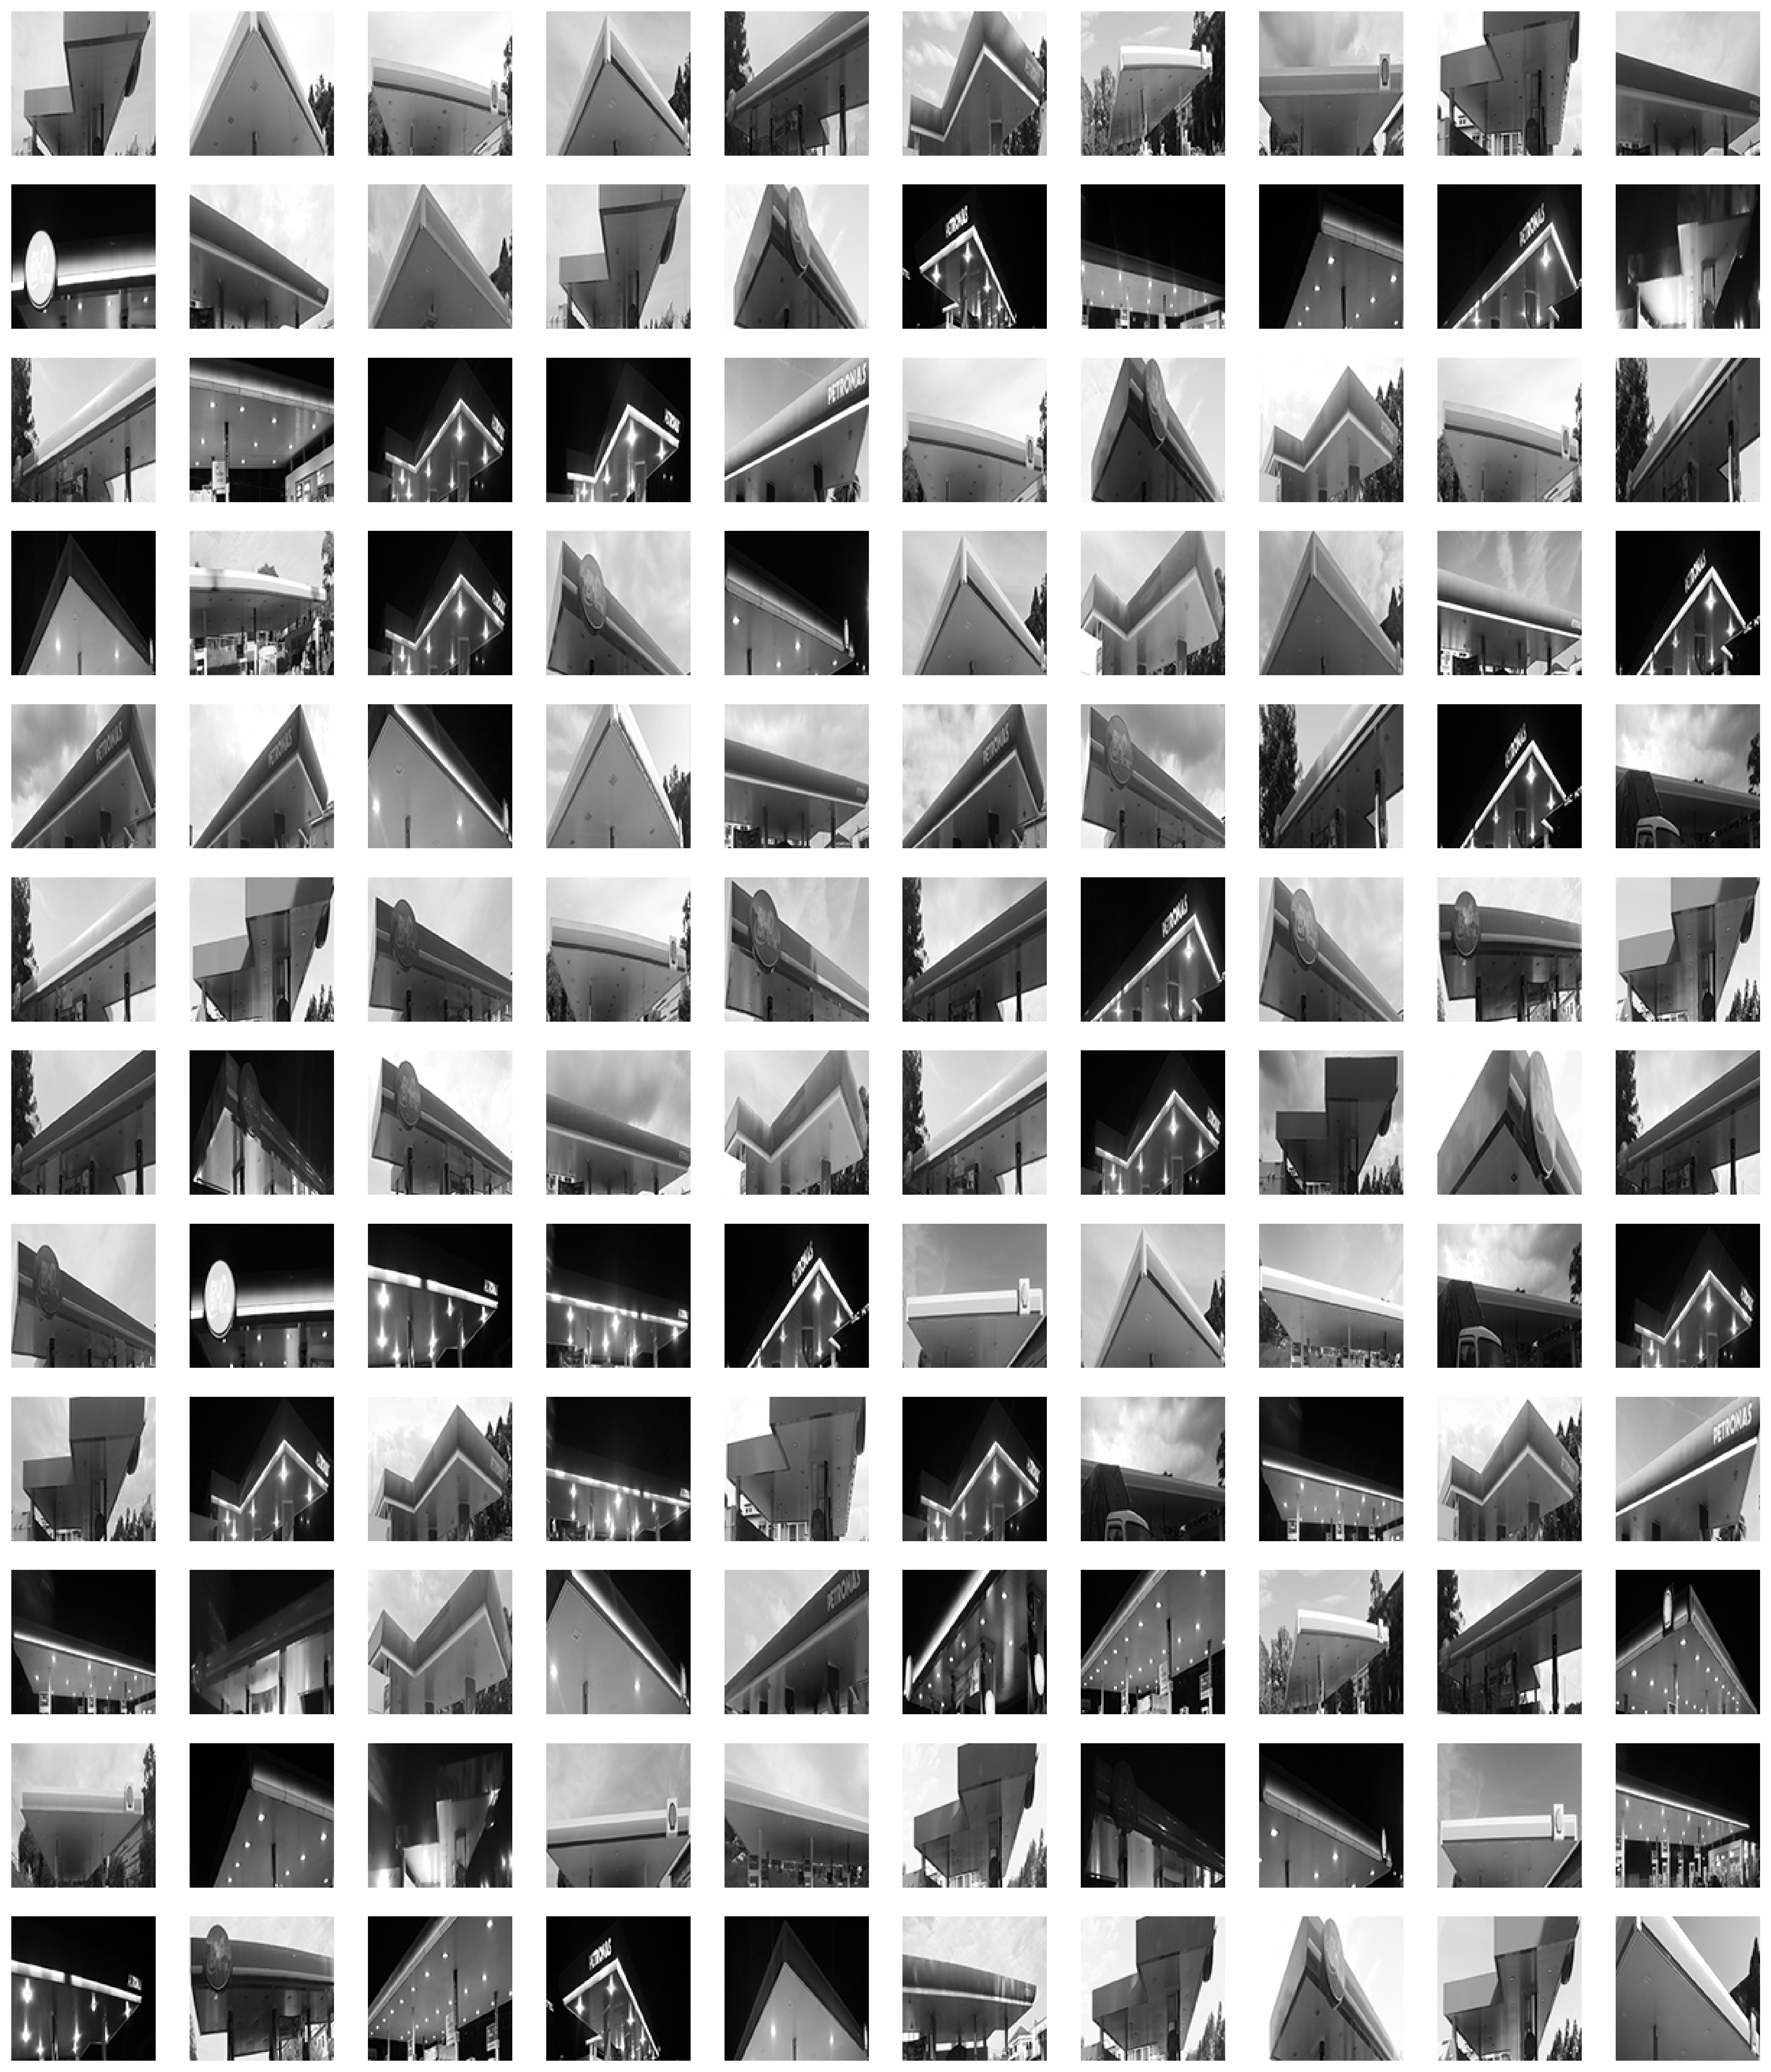

In [94]:
#Show testing images

H = 100; W = 100;
image_grid(X_test, H, W)
plt.show()

In [95]:
#Find the mean image
mean_image = np.mean(X_train, axis=0)

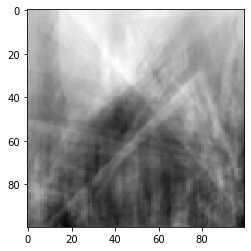

In [96]:
plt.imshow(np.reshape(mean_image, [H,W]), cmap=plt.get_cmap("gray"))

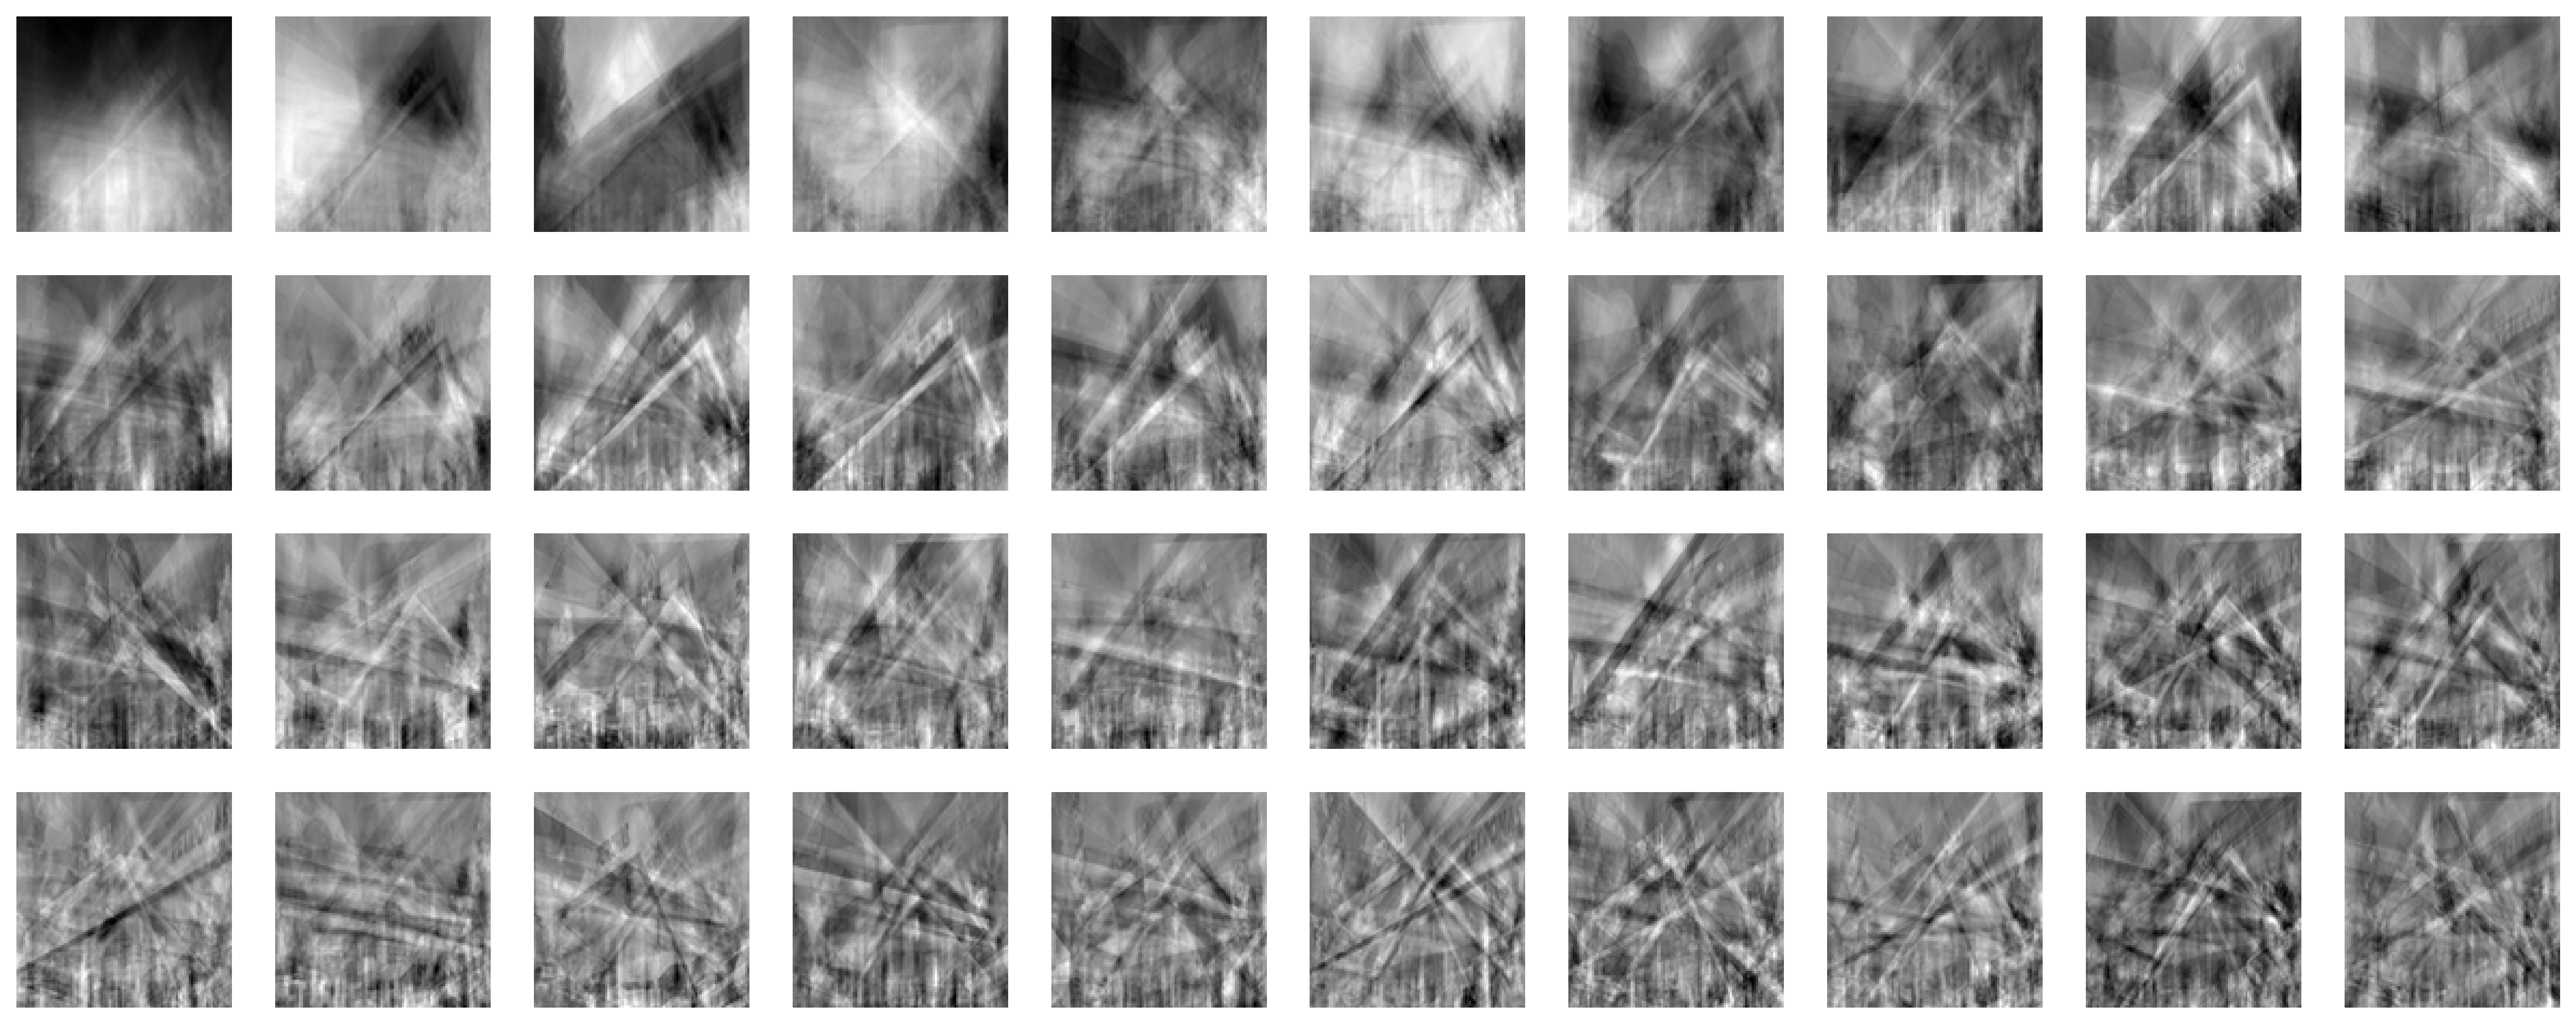

In [97]:
from sklearn.decomposition import PCA
n_components = 40

# Use dimensionality reduction on the data reshaped
X_train = X_train.reshape(180, 100*100)
X_test = X_test.reshape(120, 100*100)

# Extracting the top 40 buildings from the dataset
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

# Showing the buildings
buildings = pca.components_
image_grid(buildings[:,:], H, W)
plt.show()

buildings = buildings.reshape((n_components, H, W))

In [98]:
# Projecting the input data on the petrol stations arthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

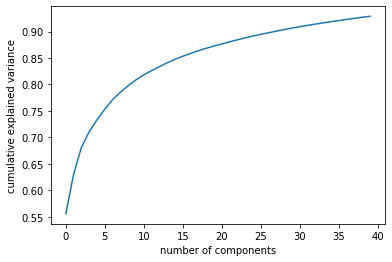

In [99]:
# Plot the cumulative variance against the number of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [100]:
# Calculate distances

intra_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[1,:]),2))
inter_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))

Intra-class distance: 52
Inter-class distance: 57


In [101]:
############### Nerual Network ###########################

In [102]:
# Train the model with Nerual Network
from sklearn.neural_network import MLPClassifier

# Create a model with 3 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

# Fit data to model with Original Data
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [103]:
# Use trained model for prediction/classification
predictions = mlp.predict(X_test)

Confusion matrix
[[35  4  3]
 [ 4 32  1]
 [ 2  2 37]]


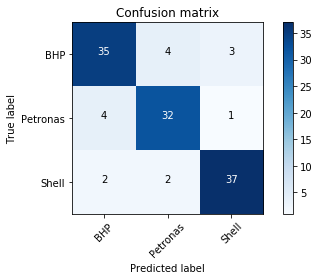

In [104]:
#Evaluation of Model - Confusion Matrix Plot
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    print('Confusion matrix')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 3.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ["BHP", "Petronas", "Shell"],
                      title='Confusion matrix')

In [105]:
#  Print Classification report and confusion matrix

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print("")
print( "Original Train Accuracy : ", round(mlp.score(X_train, Y_train)*100, 2))
print( "Original Test Accuracy : ", round(mlp.score(X_test, Y_test)*100, 2))

[[35  4  3]
 [ 4 32  1]
 [ 2  2 37]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.84      0.86      0.85        37
           2       0.90      0.90      0.90        41

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120


Original Train Accuracy :  100.0
Original Test Accuracy :  86.67


Confusion matrix
[[41  1  0]
 [ 0 37  0]
 [ 0  0 41]]


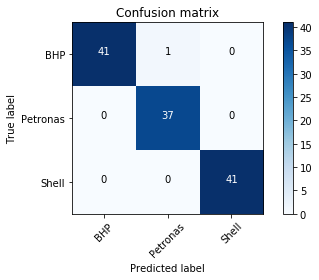

In [106]:
# Fit data to model with PCA Data
mlp.fit(X_train_pca, Y_train)

# Use trained model for prediction/classification
predictions = mlp.predict(X_test_pca)

# Confusion Matrix with PCA Data
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    print('Confusion matrix')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 3.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ["BHP", "Petronas", "Shell"],
                      title='Confusion matrix')

In [107]:


# Use trained model for prediction/classification
predictions = mlp.predict(X_test_pca)

#  Print Classification report and confusion matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print("")
print( "PCA Train Accuracy : ", round( mlp.score(X_train_pca, Y_train)*100, 2 ))
print( "PCA Test Accuracy : ", round( mlp.score(X_test_pca, Y_test )*100, 2 ))

[[41  1  0]
 [ 0 37  0]
 [ 0  0 41]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        41

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


PCA Train Accuracy :  100.0
PCA Test Accuracy :  99.17


In [108]:
############### K-Nearest Neighbor (K-NN) ###########################

<function matplotlib.pyplot.show(*args, **kw)>

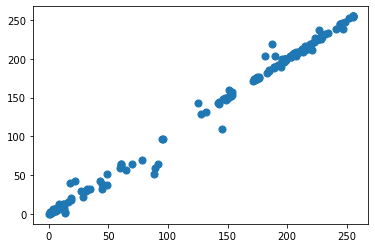

In [109]:
from sklearn.cluster import KMeans

plt.scatter(X_train[:, 0], X_train[:, 1], s=50)
plt.show

In [110]:
# Build the clustering model
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X_train, Y_train);

print("Cluster membership:\n{}".format(kmeans.labels_))

Cluster membership:
[2 2 0 2 2 1 1 1 1 2 0 1 1 2 0 0 1 0 2 1 0 1 2 2 0 0 0 1 2 0 2 2 0 2 0 2 0
 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 2 1 1 1 1 1 1 2 2 0 0 1 0 0 2 0 0 1 0 0 1 1
 0 1 0 1 2 2 0 2 2 0 1 0 1 2 2 2 1 1 0 1 1 0 0 1 2 1 1 0 2 2 2 0 0 0 0 2 0
 0 1 2 1 0 1 2 0 2 0 2 1 0 1 2 1 0 2 2 0 1 0 0 1 1 1 0 1 0 1 0 1 2 0 1 0 2
 0 1 0 0 1 1 0 1 2 2 2 0 2 0 1 1 2 0 2 0 0 2 0 2 1 0 1 1 1 2 1 0]


In [111]:
y_kmeans = kmeans.predict(X_train)

y_kmeans == kmeans.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

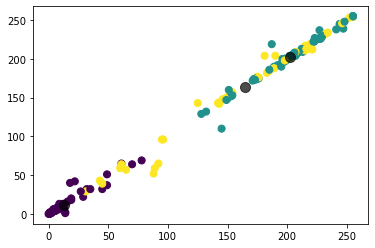

In [112]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.7, s=100)
plt.show()

In [120]:
#K-NN with original data

from sklearn.neighbors \
import KNeighborsClassifier

# Initialze k
knn = KNeighborsClassifier( n_neighbors = 3 )

# Perform k-NN training
knn.fit( X_train, Y_train)

# Performance Analysis
print("Training Accuracy : ", round(knn.score(X_train, Y_train)*100,2) )
print("Testing Accuracy : ", round(knn.score(X_test, Y_test)*100,2) )

Training Accuracy :  98.33
Testing Accuracy :  94.17


In [118]:
#K-NN with pca data

from sklearn.neighbors \
import KNeighborsClassifier

# Initialze k
knn = KNeighborsClassifier( n_neighbors = 3 )

# Perform k-NN training
knn.fit( X_train_pca, Y_train)

# Performance Analysis
print("Training Accuracy : ", round(knn.score(X_train_pca, Y_train)*100,2) )
print("Testing Accuracy : ", round(knn.score(X_test_pca, Y_test)*100,2) )

Training Accuracy :  96.11
Testing Accuracy :  87.5


In [115]:
# End #